In [7]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
dataset = load_digits()
dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64)),
 'target': array([0, 1, 2, ..., 8, 9, 8], shape=(1797,)),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7'

In [4]:
dataset.data.shape

(1797, 64)

In [5]:
dataset.images.shape

(1797, 8, 8)

In [6]:
dataset.target.shape

(1797,)

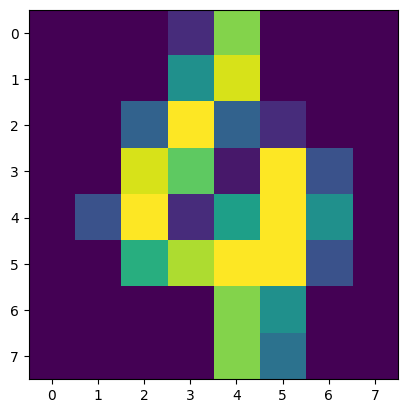

In [8]:
plt.imshow(dataset.images[100])

In [9]:
X = dataset.data
Y = dataset.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

def root_mean_square_error(Y_gt, Y_pred):
    return np.sqrt(np.mean((Y_gt - Y_pred) ** 2))


In [12]:
epochs = 80
η = 0.001 # learning rate

D_in = X_train.shape[1] # input dimension
H1 = 128 # hidden layer 1 dimension
H2 = 32 # hidden layer 2 dimension
D_out = len(np.unique(Y_train)) # output dimension (number of classes)

In [13]:
w1 = np.random.randn(D_in, H1) 
w2 = np.random.randn(H1, H2)
w3 = np.random.randn(H2, D_out)

In [14]:
B1 = np.random.randn(H1)
B2 = np.random.randn(H2)
B3 = np.random.randn(D_out)

In [ ]:
for epoch in range(epochs):
    for x, y in zip(X_train, Y_train):
        # Forward
        h1 = sigmoid(np.dot(x, w1) + B1)
        h2 = sigmoid(np.dot(h1, w2) + B2)
        y_pred = softmax(np.dot(h2, w3) + B3)

        # Backward 
        dL_dy_pred = 2 * (y_pred - y)
        dL_dw3 = np.outer(h2, dL_dy_pred)
        dL_dB3 = dL_dy_pred

        dL_dh2 = np.dot(dL_dy_pred, w3.T) * (h2 * (1 - h2))
        dL_dw2 = np.outer(h1, dL_dh2)
        dL_dB2 = dL_dh2

        dL_dh1 = np.dot(dL_dh2, w2.T) * (h1 * (1 - h1))
        dL_dw1 = np.outer(x, dL_dh1)
        dL_dB1 = dL_dh1

        # Update weights and biases
        w3 -= η * dL_dw3
        B3 -= η * dL_dB3
        w2 -= η * dL_dw2
        B2 -= η * dL_dB2
        w1 -= η * dL_dw1
        B1 -= η * dL_dB1
        
        # Compute
        acc = ... 
        loss = root_mean_square_error(y, y_pred)
